In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

app_train = pd.read_csv('drive/MyDrive/data group/application_train.csv')
install_payments = pd.read_csv('drive/MyDrive/data group/installments_payments.csv')

**installments_payments.csv**


*   Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
*   There is
    *   a) one row for every payment that was made plus
    *   b) one row each for missed payment.

One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.


**installments_payments.csv FEATURE DESCRIPTION**

**SK_ID_PREV:** The ID of previous credit in Home Credit related to loan in our sample

**SK_ID_CURR:** ID of loan in our sample

**NUM_INSTALMENT_VERSION:** Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed

**NUM_INSTALMENT_NUMBER:** On which installment we observe payment(lan tra thu bao nhieu)

**DAYS_INSTALMENT:** When the installment of previous credit was supposed to be paid (relative to application date of current loan)(ngay phai tra)

**DAYS_ENTRY_PAYMENT:** When was the installments of previous credit paid actually (relative to application date of current loan)(ngay khach hang tra)

**AMT_INSTALMENT:** What was the prescribed installment amount of previous credit on this installment(luong tien phai tra)

**AMT_PAYMENT:** What the client actually paid on previous credit on this installment(luong tien khach hang tra)

In [4]:
install_payments.head(10)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
5,1137312,164489,1.0,12,-1384.0,-1417.0,5970.375,5970.375
6,2234264,184693,4.0,11,-349.0,-352.0,29432.295,29432.295
7,1818599,111420,2.0,4,-968.0,-994.0,17862.165,17862.165
8,2723183,112102,0.0,14,-197.0,-197.0,70.740,70.740
9,1413990,109741,1.0,4,-570.0,-609.0,14308.470,14308.470


In [5]:
install_payments[install_payments['SK_ID_CURR'] == 456255]

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
11519317,1743609,456255,1.0,2,-930.0,-938.0,11090.835,11090.835
11551234,2631384,456255,3.0,4,-666.0,-692.0,27489.690,27489.690
11567206,2631384,456255,3.0,3,-696.0,-705.0,27489.690,27489.690
11578395,2631384,456255,3.0,22,-126.0,-160.0,27489.690,457.875
11589266,1743609,456255,1.0,4,-870.0,-879.0,11090.835,11090.835
...,...,...,...,...,...,...,...,...
13447478,1743609,456255,1.0,7,-780.0,-781.0,11090.835,11090.835
13552331,2631384,456255,3.0,6,-606.0,-613.0,27489.690,27489.690
13561589,1359084,456255,1.0,7,-245.0,-243.0,11314.170,11314.170
13582873,2631384,456255,3.0,12,-426.0,-435.0,27489.690,27489.690


In [6]:
install_payments.shape

(13605401, 8)

In [7]:
install_payments.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object')

In [8]:
install_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


**Basic EDA**

In [9]:
install_payments.duplicated().sum()

0

In [10]:
# NUMBER OF NULL VALUES IN EACH COLUMN
install_payments.isna().sum().sort_values(ascending=False)

DAYS_ENTRY_PAYMENT        2905
AMT_PAYMENT               2905
SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
AMT_INSTALMENT               0
dtype: int64

In [11]:
# PERCENTAGE OF NULL VALUES IN EACH COLUMN
(install_payments.isna().sum() / install_payments.shape[0]).sort_values(ascending=False)

DAYS_ENTRY_PAYMENT        0.000214
AMT_PAYMENT               0.000214
SK_ID_PREV                0.000000
SK_ID_CURR                0.000000
NUM_INSTALMENT_VERSION    0.000000
NUM_INSTALMENT_NUMBER     0.000000
DAYS_INSTALMENT           0.000000
AMT_INSTALMENT            0.000000
dtype: float64

Two columns: the day and the amount customers actually paid (DAYS_ENTRY_PAYMENT and AMT_PAYMENT) include the same amount of null values

0.02% of clients haven't paid previous credit on this installment

In [12]:
install_payments.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,13605401.0,1.903365e+06,536202.905546,1000001.0,1434191.000,1896520.000,2369094.000,2843499.000
SK_ID_CURR,13605401.0,2.784449e+05,102718.310411,100001.0,189639.000,278685.000,367530.000,456255.000
NUM_INSTALMENT_VERSION,13605401.0,8.566373e-01,1.035216,0.0,0.000,1.000,1.000,178.000
NUM_INSTALMENT_NUMBER,13605401.0,1.887090e+01,26.664067,1.0,4.000,8.000,19.000,277.000
DAYS_INSTALMENT,13605401.0,-1.042270e+03,800.946284,-2922.0,-1654.000,-818.000,-361.000,-1.000
DAYS_ENTRY_PAYMENT,13602496.0,-1.051114e+03,800.585883,-4921.0,-1662.000,-827.000,-370.000,-1.000
AMT_INSTALMENT,13605401.0,1.705091e+04,50570.254429,0.0,4226.085,8884.080,16710.210,3771487.845
AMT_PAYMENT,13602496.0,1.723822e+04,54735.783981,0.0,3398.265,8125.515,16108.425,3771487.845


That the average AMT_INSTALLMENTS (the prescribed installment amount on this installment is) smaller than AMT_PAYMENTS (the amount client actually paid on this installment) suggests:

Some loans are not repayed on time

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1fae133390>,
      dtype=object)

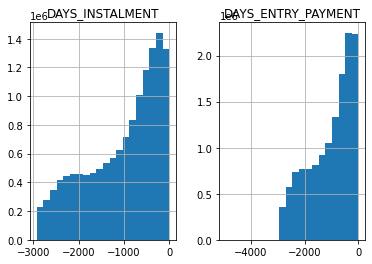

In [13]:
# histogram
install_payments.iloc[:,4:6].hist(bins=20)

The histogram of prescribed installment day and actually paid day also suggests late payment of the customer

Correlation

In [14]:
install_payments.corr()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
SK_ID_PREV,1.000000,0.002132,0.000685,-0.002095,0.003748,0.003734,0.002042,0.001887
SK_ID_CURR,0.002132,1.000000,0.000480,-0.000548,0.001191,0.001215,-0.000226,-0.000124
NUM_INSTALMENT_VERSION,0.000685,0.000480,1.000000,-0.323414,0.130244,0.128124,0.168109,0.177176
NUM_INSTALMENT_NUMBER,-0.002095,-0.000548,-0.323414,1.000000,0.090286,0.094305,-0.089640,-0.087664
DAYS_INSTALMENT,0.003748,0.001191,0.130244,0.090286,1.000000,0.999491,0.125985,0.127018
DAYS_ENTRY_PAYMENT,0.003734,0.001215,0.128124,0.094305,0.999491,1.000000,0.125555,0.126602
AMT_INSTALMENT,0.002042,-0.000226,0.168109,-0.089640,0.125985,0.125555,1.000000,0.937191
AMT_PAYMENT,0.001887,-0.000124,0.177176,-0.087664,0.127018,0.126602,0.937191,1.000000


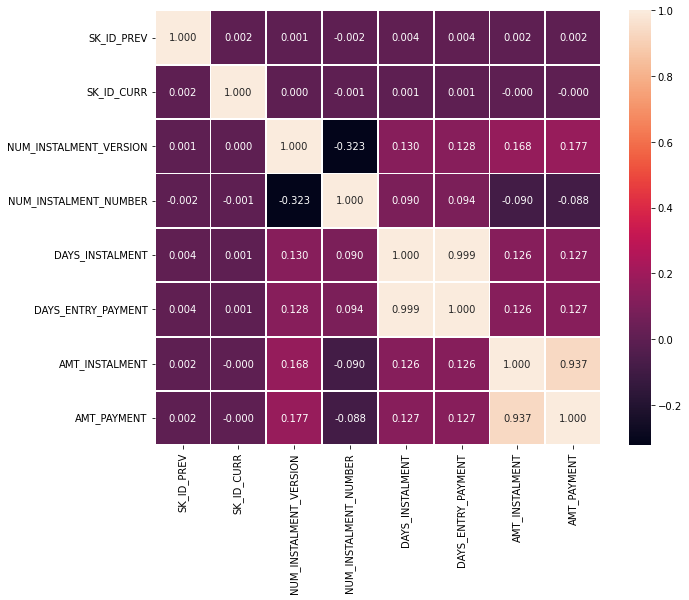

In [15]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(install_payments.corr(), annot = True, fmt = ".3f", linewidths = 1, ax = ax)

plt.show()

In [16]:
install_merged = pd.merge(app_train[['SK_ID_CURR','TARGET']], install_payments, how = 'left', on = ['SK_ID_CURR'])

In [17]:
install_merged

,SK_ID_CURR,TARGET,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,100002,1,1038818.0,1.0,16.0,-115.0,-133.0,9251.775,9251.775
1,100002,1,1038818.0,1.0,8.0,-355.0,-375.0,9251.775,9251.775
2,100002,1,1038818.0,2.0,19.0,-25.0,-49.0,53093.745,53093.745
3,100002,1,1038818.0,1.0,12.0,-235.0,-250.0,9251.775,9251.775
4,100002,1,1038818.0,1.0,9.0,-325.0,-344.0,9251.775,9251.775
...,...,...,...,...,...,...,...,...,...
11607455,456255,0,1743609.0,1.0,7.0,-780.0,-781.0,11090.835,11090.835
11607456,456255,0,2631384.0,3.0,6.0,-606.0,-613.0,27489.690,27489.690
11607457,456255,0,1359084.0,1.0,7.0,-245.0,-243.0,11314.170,11314.170
11607458,456255,0,2631384.0,3.0,12.0,-426.0,-435.0,27489.690,27489.690


In [18]:
def done_previous_credit_or_not(df):
  # hàm này dùng để kiểm tra xem cust có trả đủ tiền hoặc nhiều hơn
  # số tiền cần trả trước hạn or đúng hạn. Nếu đúng return 1, không thì return 0
    time = df['DAYS_INSTALMENT'] >= df['DAYS_ENTRY_PAYMENT']
    money = df['AMT_PAYMENT'] >= df['AMT_INSTALMENT']

    if time and money:
        return 1
    else:
      return 0

install_merged['DONE_PREV_CRE'] = install_merged.apply(done_previous_credit_or_not, axis=1)

In [19]:
install_merged

,SK_ID_CURR,TARGET,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,DONE_PREV_CRE
0,100002,1,1038818.0,1.0,16.0,-115.0,-133.0,9251.775,9251.775,1
1,100002,1,1038818.0,1.0,8.0,-355.0,-375.0,9251.775,9251.775,1
2,100002,1,1038818.0,2.0,19.0,-25.0,-49.0,53093.745,53093.745,1
3,100002,1,1038818.0,1.0,12.0,-235.0,-250.0,9251.775,9251.775,1
4,100002,1,1038818.0,1.0,9.0,-325.0,-344.0,9251.775,9251.775,1
...,...,...,...,...,...,...,...,...,...,...
11607455,456255,0,1743609.0,1.0,7.0,-780.0,-781.0,11090.835,11090.835,1
11607456,456255,0,2631384.0,3.0,6.0,-606.0,-613.0,27489.690,27489.690,1
11607457,456255,0,1359084.0,1.0,7.0,-245.0,-243.0,11314.170,11314.170,0
11607458,456255,0,2631384.0,3.0,12.0,-426.0,-435.0,27489.690,27489.690,1


In [36]:
install_merged['DONE_PREV_CRE_SUM'] = install_merged.groupby(['SK_ID_CURR'])['DONE_PREV_CRE'].transform('sum')
# tổng số thanh toán thỏa mã yêu cầu của function "done_previous_credit_or_not"

In [37]:
install_merged

,SK_ID_CURR,TARGET,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,DONE_PREV_CRE,DONE_PREV_CRE_SUM,INSTALLMENT_COUNT
0,100002,1,1038818.0,1.0,16.0,-115.0,-133.0,9251.775,9251.775,1,19,19
1,100002,1,1038818.0,1.0,8.0,-355.0,-375.0,9251.775,9251.775,1,19,19
2,100002,1,1038818.0,2.0,19.0,-25.0,-49.0,53093.745,53093.745,1,19,19
3,100002,1,1038818.0,1.0,12.0,-235.0,-250.0,9251.775,9251.775,1,19,19
4,100002,1,1038818.0,1.0,9.0,-325.0,-344.0,9251.775,9251.775,1,19,19
...,...,...,...,...,...,...,...,...,...,...,...,...
11607455,456255,0,1743609.0,1.0,7.0,-780.0,-781.0,11090.835,11090.835,1,53,74
11607456,456255,0,2631384.0,3.0,6.0,-606.0,-613.0,27489.690,27489.690,1,53,74
11607457,456255,0,1359084.0,1.0,7.0,-245.0,-243.0,11314.170,11314.170,0,53,74
11607458,456255,0,2631384.0,3.0,12.0,-426.0,-435.0,27489.690,27489.690,1,53,74


In [38]:
install_merged['INSTALLMENT_COUNT'] = install_merged.groupby(['SK_ID_CURR'])['DONE_PREV_CRE'].transform('count')
# số khoản thanh toán của mỗi ID)

In [39]:
install_merged

,SK_ID_CURR,TARGET,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,DONE_PREV_CRE,DONE_PREV_CRE_SUM,INSTALLMENT_COUNT
0,100002,1,1038818.0,1.0,16.0,-115.0,-133.0,9251.775,9251.775,1,19,19
1,100002,1,1038818.0,1.0,8.0,-355.0,-375.0,9251.775,9251.775,1,19,19
2,100002,1,1038818.0,2.0,19.0,-25.0,-49.0,53093.745,53093.745,1,19,19
3,100002,1,1038818.0,1.0,12.0,-235.0,-250.0,9251.775,9251.775,1,19,19
4,100002,1,1038818.0,1.0,9.0,-325.0,-344.0,9251.775,9251.775,1,19,19
...,...,...,...,...,...,...,...,...,...,...,...,...
11607455,456255,0,1743609.0,1.0,7.0,-780.0,-781.0,11090.835,11090.835,1,53,74
11607456,456255,0,2631384.0,3.0,6.0,-606.0,-613.0,27489.690,27489.690,1,53,74
11607457,456255,0,1359084.0,1.0,7.0,-245.0,-243.0,11314.170,11314.170,0,53,74
11607458,456255,0,2631384.0,3.0,12.0,-426.0,-435.0,27489.690,27489.690,1,53,74


In [40]:
features = ['DONE_PREV_CRE_SUM','INSTALLMENT_COUNT']
install_payments_merged = install_merged.groupby(['SK_ID_CURR'])[features].first().reset_index()

In [41]:
install_payments_merged

,SK_ID_CURR,DONE_PREV_CRE_SUM,INSTALLMENT_COUNT
0,100002,19,19
1,100003,25,25
2,100004,3,3
3,100006,16,16
4,100007,47,66
...,...,...,...
307506,456251,7,7
307507,456252,5,6
307508,456253,12,14
307509,456254,19,19


In [42]:
install_payments_merged['DONE_PREV_CRE_PERCENT'] = install_payments_merged['DONE_PREV_CRE_SUM'] / install_payments_merged['INSTALLMENT_COUNT']
install_payments_merged['DONE_PREV_CRE_PERCENT'].describe()

count    307511.000000
mean          0.837770
std           0.260679
min           0.000000
25%           0.793103
50%           0.958333
75%           1.000000
max           1.000000
Name: DONE_PREV_CRE_PERCENT, dtype: float64

In [43]:
install_payments_merged

,SK_ID_CURR,DONE_PREV_CRE_SUM,INSTALLMENT_COUNT,DONE_PREV_CRE_PERCENT
0,100002,19,19,1.000000
1,100003,25,25,1.000000
2,100004,3,3,1.000000
3,100006,16,16,1.000000
4,100007,47,66,0.712121
...,...,...,...,...
307506,456251,7,7,1.000000
307507,456252,5,6,0.833333
307508,456253,12,14,0.857143
307509,456254,19,19,1.000000


####**Drop:** SK_ID_PREV, NUM_INSTALMENT_VERSION, NUM_INSTALMENT_NUMBER, DAYS_INSTALMENT, DAYS_ENTRY_PAYMENT, AMT_INSTALMENT, AMT_PAYMENT	

####**Tạo thêm:**
DONE_PREV_CRE để check cust có thỏa mã trả đủ và kịp thời hạn ko, 1 có 2 ko
(dựa trên DAYS_INSTALMENT, DAYS_ENTRY_PAYMENT, AMT_INSTALMENT, AMT_PAYMENT)

DONE_PREV_CRE_SUM

DONE_PREV_CRE_PERCENT

INSTALLMENT_COUNT